In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [28]:
address = 'Hyderabad'

geolocator = Nominatim(user_agent="ny_explorer",timeout=3)
location = geolocator.geocode(address)
hyd_latitude = location.latitude
hyd_longitude = location.longitude
print('The geograpical coordinate of Hyderabad are {}, {}.'.format(hyd_latitude, hyd_longitude))

The geograpical coordinate of Hyderabad are 17.38878595, 78.4610647345315.


In [5]:
# create map of Manhattan using latitude and longitude values
map_hyderabad = folium.Map(location=[hyd_latitude, hyd_longitude], zoom_start=11)
map_hyderabad 

In [6]:
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate

In [7]:
url="https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Hyderabad,_India"
response = requests.get(url)
soup = BeautifulSoup(response.content,'html.parser')
neighbours = soup.find("div",{'class':'mw-category'})

In [8]:
links = neighbours.findAll("a")
areas=[]
for link in links:
    areas.append(link.get('title'))
print(areas)

['A. S. Rao Nagar', 'A.C. Guards', 'Abhyudaya Nagar', 'Abids', 'Adikmet', 'Afzal Gunj', 'Aghapura', 'Aliabad, Hyderabad', 'Alijah Kotla', 'Allwyn Colony', 'Alwal', 'Amberpet', 'Ameerpet', 'Ashok Nagar, Hyderabad', 'Asif Nagar', 'Attapur', 'Azamabad, Hyderabad', 'Azampura', 'Badichowdi', 'Bagh Lingampally', 'Bairamalguda', 'Balkampet', 'Banjara Hills', 'Bank Street, Hyderabad', 'Barkas, Hyderabad', 'Barkatpura', 'Basheerbagh', 'Bazarghat', 'Begum Bazaar', 'Begumpet', 'Bharat Nagar', 'BHEL Township, Hyderabad', 'BJR Nagar', 'Boggulkunta', 'Borabanda', 'Bowenpally', 'Brahman Vaadi', 'Chaderghat', 'Champapet', 'Chanchalguda', 'Chandrayan Gutta', 'Chatta Bazaar', 'Cherlapally', 'Chikkadpally', 'Chilkalguda', 'Chintal Basti', 'Chintalakunta', 'Dabirpura', 'Dar-ul-Shifa', 'Dhoolpet', 'Dilsukhnagar', 'Domalguda', "ECIL 'X' Roads", 'Edi Bazar', 'Erragadda', 'Etymology of localities of Hyderabad', 'Fateh Nagar, Hyderabad', 'Ferozguda', 'Film Nagar', 'Gachibowli', 'Gaddiannaram', 'Golnaka', 'Gosh

In [9]:
hyd_neighbours = pd.DataFrame()
hyd_neighbours['Neighbourhood'] = areas

In [10]:
hyd_neighbours.head()

,Neighbourhood
0,A. S. Rao Nagar
1,A.C. Guards
2,Abhyudaya Nagar
3,Abids
4,Adikmet


In [11]:
hyd_neighbours.shape

(200, 1)

In [ ]:
latitude = []
longitude = []
hyd_area = []
for area in hyd_neighbours['Neighbourhood']:
  address = area + ", Hyderabad, Telangana, India"  
  geolocator = Nominatim(user_agent="ny_explorer",timeout=10)
  location = geolocator.geocode(address)
  if location:
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    hyd_area.append(area)

In [24]:
hyd = pd.DataFrame({'Neighbour': hyd_area, 'Latitude': latitude,'Longitude':longitude})
hyd.head(10)

,Neighbour,Latitude,Longitude
0,A.C. Guards,17.402804,78.459487
1,Abhyudaya Nagar,17.337661,78.564716
2,Abids,17.389478,78.477182
3,Adikmet,17.409550,78.513094
4,Aghapura,17.389178,78.465273
5,"Aliabad, Hyderabad",17.345630,78.472680
6,Alijah Kotla,17.360545,78.480102
7,Allwyn Colony,17.492035,78.349953
8,Alwal,17.502229,78.508858
9,Amberpet,17.390263,78.516481


In [25]:
hyd.shape

(154, 3)

In [29]:
# Please refer the pdf for Folium map as not displayed in github
map_hyd = folium.Map(location=[hyd_latitude, hyd_longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(hyd['Latitude'], hyd['Longitude'], hyd['Neighbour']):
    label = '{}, {}'.format(neighborhood,'Hyderabad, Telangana, India')
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#87cefa',
        fill_opacity=0.5,
        parse_html=False).add_to(map_hyd)

In [30]:
map_hyd

In [31]:
CLIENT_ID = 'JSQWPMQQXDCOUODZVJIYCP4YCB2SQJ5HH4SAUU231M2XY3RY' # your Foursquare ID
CLIENT_SECRET = 'T0AA55OYN5U0BENTGMWMSPE3XMPXIONXOUXNYJ3B4D4VBMFQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JSQWPMQQXDCOUODZVJIYCP4YCB2SQJ5HH4SAUU231M2XY3RY
CLIENT_SECRET:T0AA55OYN5U0BENTGMWMSPE3XMPXIONXOUXNYJ3B4D4VBMFQ


In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
manhattan_venues = getNearbyVenues(names=hyd['Neighbour'],
                                   latitudes=hyd['Latitude'],
                                   longitudes=hyd['Longitude']
                                  )

A.C. Guards
Abhyudaya Nagar
Abids
Adikmet
Aghapura
Aliabad, Hyderabad
Alijah Kotla
Allwyn Colony
Alwal
Amberpet
Ameerpet
Ashok Nagar, Hyderabad
Asif Nagar
Attapur
Azamabad, Hyderabad
Azampura
Badichowdi
Bagh Lingampally
Bairamalguda
Balkampet
Banjara Hills
Bank Street, Hyderabad
Barkas, Hyderabad
Barkatpura
Basheerbagh
Bazarghat
Begum Bazaar
Begumpet
Bharat Nagar
BHEL Township, Hyderabad
Borabanda
Bowenpally
Chaderghat
Champapet
Chanchalguda
Chandrayan Gutta
Cherlapally
Chikkadpally
Chilkalguda
Chintal Basti
Dabirpura
Dar-ul-Shifa
Dhoolpet
Dilsukhnagar
Domalguda
Erragadda
Fateh Nagar, Hyderabad
Ferozguda
Film Nagar
Gachibowli
Gaddiannaram
Golnaka
Goshamahal
Gudimalkapur
Gulzar Houz
Habsiguda
Hafeezpet
Hasmathpet
Hastinapuram
Hayathnagar
Himayatnagar, Hyderabad
HITEC City
Hyderguda
Izzat Nagar
Jahanuma
Jamia Osmania
Jeedimetla
Jubilee Hills
Kachiguda
Kamala Nagar, Hyderabad
Kapra
Karkhana, Secunderabad
Karmanghat
Karwan
Kavadiguda
Khairtabad
Khajaguda
Khilwat
Kings Colony, Shastripuram


In [36]:
print(manhattan_venues.shape)
manhattan_venues.head()

(974, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,A.C. Guards,17.402804,78.459487,Chicha's,17.403255,78.460152,Hyderabadi Restaurant
1,A.C. Guards,17.402804,78.459487,Taiba Bakers & Confectioners,17.402530,78.456823,Bakery
2,A.C. Guards,17.402804,78.459487,Cafe Niloufer & Bakers,17.399715,78.462881,Café
3,A.C. Guards,17.402804,78.459487,Jewel Of Nizam,17.403869,78.461194,Middle Eastern Restaurant
4,A.C. Guards,17.402804,78.459487,Rayalaseema Ruchulu,17.403084,78.463012,South Indian Restaurant


In [38]:
manhattan_venues[manhattan_venues['Neighborhood'] == 'Gachibowli']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
288,Gachibowli,17.443622,78.351964,creamstone,17.442998,78.355475,Ice Cream Shop
289,Gachibowli,17.443622,78.351964,Karachi Bakery,17.442930,78.355336,Bakery
290,Gachibowli,17.443622,78.351964,Gachibowli Stadium,17.445982,78.348245,Stadium
291,Gachibowli,17.443622,78.351964,Chettinaduvilas,17.442858,78.356053,Food Truck
292,Gachibowli,17.443622,78.351964,Mustang terrace,17.442840,78.355320,Italian Restaurant
293,Gachibowli,17.443622,78.351964,Cafe Coffee Day,17.442771,78.355737,Café
294,Gachibowli,17.443622,78.351964,Adithya inn,17.443037,78.354475,Hotel
295,Gachibowli,17.443622,78.351964,Cibo House,17.443122,78.354781,Italian Restaurant
296,Gachibowli,17.443622,78.351964,Olive Garden,17.442895,78.355625,Indian Restaurant
297,Gachibowli,17.443622,78.351964,Star Hypermarket,17.444351,78.355490,Department Store


In [40]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
A.C. Guards,12,12,12,12,12,12
Abhyudaya Nagar,5,5,5,5,5,5
Abids,16,16,16,16,16,16
Adikmet,4,4,4,4,4,4
Aghapura,4,4,4,4,4,4
"Aliabad, Hyderabad",5,5,5,5,5,5
Allwyn Colony,4,4,4,4,4,4
Alwal,4,4,4,4,4,4
Amberpet,2,2,2,2,2,2


In [41]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 151 uniques categories.


In [45]:
##Extracting only Restaurant venues
hyd_restaurants = manhattan_venues[manhattan_venues['Venue Category'].str.contains("Restaurant")]
hyd_restaurants.head()

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,A.C. Guards,17.402804,78.459487,Chicha's,17.403255,78.460152,Hyderabadi Restaurant
1,3,A.C. Guards,17.402804,78.459487,Jewel Of Nizam,17.403869,78.461194,Middle Eastern Restaurant
2,4,A.C. Guards,17.402804,78.459487,Rayalaseema Ruchulu,17.403084,78.463012,South Indian Restaurant
3,5,A.C. Guards,17.402804,78.459487,Shahi Dastarkhwan,17.402640,78.461399,Hyderabadi Restaurant
4,7,A.C. Guards,17.402804,78.459487,Hyderabad House,17.402775,78.456992,Indian Restaurant


In [57]:
# Showing restaurants in given neighbourhood
Punjagutta_restaurants = hyd_restaurants[hyd_restaurants['Neighborhood']=='Punjagutta']
map_punjagutta = folium.Map(location=['17.425493', '78.448774'], zoom_start=30)


# add markers to map
for lat, lng, neighborhood,category in zip(Punjagutta_restaurants['Venue Latitude'], Punjagutta_restaurants['Venue Longitude'], Punjagutta_restaurants['Venue'],Punjagutta_restaurants['Venue Category']):
    label = '{}, {}'.format(neighborhood,category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#87cefa',
        fill_opacity=0.5,
        parse_html=False).add_to(map_punjagutta)

In [58]:
map_punjagutta

In [59]:
## What is the best area to open a restaurant in hyderabad

hyd_restaurantsmap = folium.Map(location=['17.38878595', '78.4610647345315'], zoom_start=12)

# add markers to map
for lat, lng, neighborhood,category in zip(hyd_restaurants['Venue Latitude'], hyd_restaurants['Venue Longitude'], hyd_restaurants['Venue'],hyd_restaurants['Venue Category']):
    label = '{}, {}'.format(neighborhood,category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#87cefa',
        fill_opacity=0.5,
        parse_html=False).add_to(hyd_restaurantsmap)

In [60]:
# Please refer the pdf for Folium map as not displayed in github
hyd_restaurantsmap

In [64]:
hyd_restaurants.groupby('Neighborhood').count().sort_values(by='Venue Category')

,index,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
"Kings Colony, Shastripuram",1,1,1,1,1,1,1
"Koti, Hyderabad",1,1,1,1,1,1,1
Chanchalguda,1,1,1,1,1,1,1
Chandrayan Gutta,1,1,1,1,1,1,1
Chilkalguda,1,1,1,1,1,1,1
Dhoolpet,1,1,1,1,1,1,1
Ferozguda,1,1,1,1,1,1,1
Moula-Ali,1,1,1,1,1,1,1
Moosarambagh,1,1,1,1,1,1,1


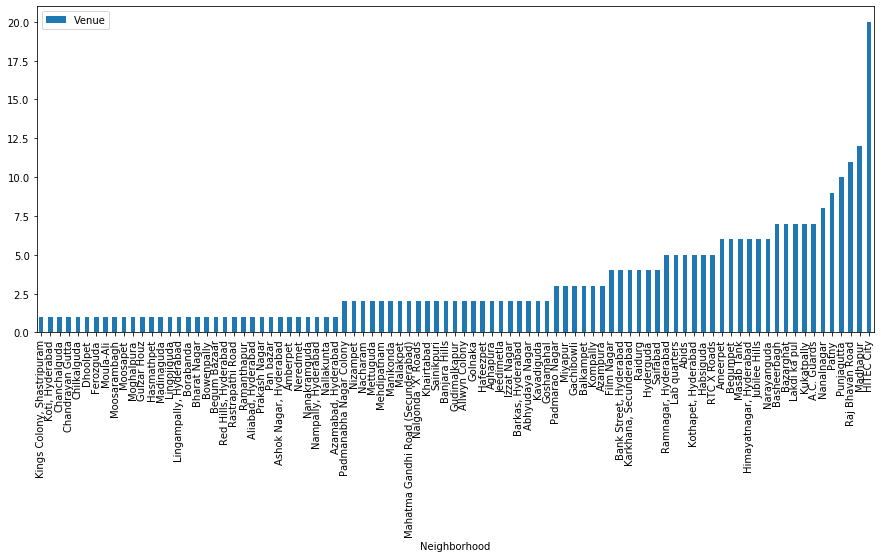

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
hyd_restaurants.groupby('Neighborhood')[["Venue"]].count().sort_values(by='Venue').plot(kind='bar',figsize=(15,6))

In [72]:
# one hot encoding
restaurants_onehot = pd.get_dummies(hyd_restaurants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
restaurants_onehot['Neighborhood'] = hyd_restaurants['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [restaurants_onehot.columns[-1]] + list(restaurants_onehot.columns[:-1])
restaurants_onehot = restaurants_onehot[fixed_columns]

restaurants_onehot.head()

,Neighborhood,Afghan Restaurant,Andhra Restaurant,Asian Restaurant,Bengali Restaurant,Chinese Restaurant,Doner Restaurant,Falafel Restaurant,Fast Food Restaurant,Greek Restaurant,...,North Indian Restaurant,Punjabi Restaurant,Rajasthani Restaurant,Restaurant,Seafood Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Tex-Mex Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,A.C. Guards,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A.C. Guards,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A.C. Guards,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,A.C. Guards,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A.C. Guards,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
restaurants_grouped = restaurants_onehot.groupby('Neighborhood').mean().reset_index()
restaurants_grouped

,Neighborhood,Afghan Restaurant,Andhra Restaurant,Asian Restaurant,Bengali Restaurant,Chinese Restaurant,Doner Restaurant,Falafel Restaurant,Fast Food Restaurant,Greek Restaurant,...,North Indian Restaurant,Punjabi Restaurant,Rajasthani Restaurant,Restaurant,Seafood Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Tex-Mex Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,A.C. Guards,0.0,0.0,0.000,0.000000,0.000000,0.0,0.000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000,0.142857,0.0,0.0,0.0,0.000000
1,Abhyudaya Nagar,0.0,0.0,0.000,0.000000,0.000000,0.0,0.000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.000000
2,Abids,0.0,0.0,0.000,0.000000,0.000000,0.0,0.000,0.200000,0.00,...,0.0,0.0,0.0,0.000000,0.000,0.200000,0.0,0.0,0.0,0.000000
3,Aghapura,0.5,0.0,0.000,0.000000,0.000000,0.0,0.000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.000000
4,"Aliabad, Hyderabad",0.0,0.0,1.000,0.000000,0.000000,0.0,0.000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.000000
5,Allwyn Colony,0.0,0.0,0.000,0.000000,0.000000,0.0,0.000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000,0.000000,0.5,0.0,0.0,0.000000
6,Amberpet,0.0,0.0,0.000,0.000000,0.000000,0.0,0.000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.000000
7,Ameerpet,0.0,0.0,0.000,0.000000,0.000000,0.0,0.000,0.166667,0.00,...,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.166667
8,"Ashok Nagar, Hyderabad",0.0,0.0,0.000,0.000000,0.000000,0.0,0.000,1.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.000000
9,"Azamabad, Hyderabad",0.0,0.0,0.000,0.000000,1.000000,0.0,0.000,0.000000,0.00,...,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.000000


In [75]:
num_top_venues = 5

for food in restaurants_grouped['Neighborhood']:
    print("----"+food+"----")
    temp = restaurants_grouped[restaurants_grouped['Neighborhood'] == food].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----A.C. Guards----
                       venue  freq
0          Indian Restaurant  0.43
1      Hyderabadi Restaurant  0.29
2    South Indian Restaurant  0.14
3  Middle Eastern Restaurant  0.14
4          Afghan Restaurant  0.00


----Abhyudaya Nagar----
                       venue  freq
0          Indian Restaurant   1.0
1          Afghan Restaurant   0.0
2  Middle Eastern Restaurant   0.0
3         Turkish Restaurant   0.0
4         Tex-Mex Restaurant   0.0


----Abids----
                            venue  freq
0               Indian Restaurant   0.6
1         South Indian Restaurant   0.2
2            Fast Food Restaurant   0.2
3               Afghan Restaurant   0.0
4  Multicuisine Indian Restaurant   0.0


----Aghapura----
                       venue  freq
0          Afghan Restaurant   0.5
1          Indian Restaurant   0.5
2  Middle Eastern Restaurant   0.0
3         Turkish Restaurant   0.0
4         Tex-Mex Restaurant   0.0


----Aliabad, Hyderabad----
                    

4         Tex-Mex Restaurant   0.0


----Nalgonda 'X' Roads----
                       venue  freq
0  Middle Eastern Restaurant   0.5
1          Indian Restaurant   0.5
2          Afghan Restaurant   0.0
3         Turkish Restaurant   0.0
4         Tex-Mex Restaurant   0.0


----Nallakunta----
                       venue  freq
0          Indian Restaurant   1.0
1          Afghan Restaurant   0.0
2  Middle Eastern Restaurant   0.0
3         Turkish Restaurant   0.0
4         Tex-Mex Restaurant   0.0


----Nampally, Hyderabad----
                       venue  freq
0          Indian Restaurant   1.0
1          Afghan Restaurant   0.0
2  Middle Eastern Restaurant   0.0
3         Turkish Restaurant   0.0
4         Tex-Mex Restaurant   0.0


----Nanakramguda----
                       venue  freq
0         Italian Restaurant   1.0
1          Afghan Restaurant   0.0
2  Middle Eastern Restaurant   0.0
3         Turkish Restaurant   0.0
4         Tex-Mex Restaurant   0.0


----Nanalnagar----
 

In [76]:
# set number of clusters
kclusters = 3

restaurants_grouped_clustering = restaurants_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(restaurants_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2,
       0, 0, 0])

In [78]:
restaurants_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [80]:
restaurants_merge = hyd_restaurants.join(restaurants_grouped.set_index('Neighborhood'), on='Neighborhood')

restaurants_merge.head() # check the last columns!

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,Afghan Restaurant,...,North Indian Restaurant,Punjabi Restaurant,Rajasthani Restaurant,Restaurant,Seafood Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Tex-Mex Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,0,A.C. Guards,17.402804,78.459487,Chicha's,17.403255,78.460152,Hyderabadi Restaurant,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0
1,3,A.C. Guards,17.402804,78.459487,Jewel Of Nizam,17.403869,78.461194,Middle Eastern Restaurant,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0
2,4,A.C. Guards,17.402804,78.459487,Rayalaseema Ruchulu,17.403084,78.463012,South Indian Restaurant,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0
3,5,A.C. Guards,17.402804,78.459487,Shahi Dastarkhwan,17.402640,78.461399,Hyderabadi Restaurant,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0
4,7,A.C. Guards,17.402804,78.459487,Hyderabad House,17.402775,78.456992,Indian Restaurant,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0


In [86]:
# create map
map_clusters = folium.Map(location=['17.38878595', '78.4610647345315'], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(restaurants_merge['Venue Latitude'], restaurants_merge['Venue Longitude'], restaurants_merge['Neighborhood'], restaurants_merge['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
# Please refer the pdf for Folium map as not displayed in github
map_clusters